In [41]:
#Entscheidung welche Merkmalsvariablen für die Aufgabe relevant sind
#Prinzipiell von Vorteil Merkmalsvariablen auf ein Minimum zu reduzieren
#FDR

In [42]:
import pandas as pd
from sklearn.linear_model import Lasso

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Überprüfen der Daten
print(data.head())

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls']
target = 'calls'

# Extrahieren der Daten
X = data[features]
y = data[target]

# Lasso-Regression mit L1-Regularisierung
lasso = Lasso(alpha=50)
lasso.fit(X, y)

# Anzeigen der Koeffizienten
print("Koeffizienten:", lasso.coef_)

# Anzeigen der ausgewählten Merkmale
selected_features = [feature for feature, coef in zip(features, lasso.coef_) if coef != 0]
print("Ausgewählte Merkmale:", selected_features)

# Optional: Speichern der ausgewählten Merkmale in eine separate CSV-Datei
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features_calls'])
selected_features_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/selected_features.csv', index=False)


         date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0  2016-04-01           0      73   8154    1700     90         4       0   
1  2016-04-02           1      64   8526    1700     90        70       0   
2  2016-04-03           2      68   8088    1700     90         0       0   
3  2016-04-04           3      71   7044    1700     90         0       0   
4  2016-04-05           4      63   7236    1700     90         0       0   

   weekday  year  ...  Residuals_Sick-ratio  Ausreißer_Sick-ratio  \
0        4  2016  ...              0.006245                 False   
1        5  2016  ...              0.006245                 False   
2        6  2016  ...              0.006245                 False   
3        0  2016  ...              0.006245                 False   
4        1  2016  ...              0.006245                 False   

   rolling_mean_7_calls  rolling_mean_7_Sick-ratio  lag_49_calls  \
0                7392.0                   0.039748    

In [43]:
import pandas as pd
from sklearn.linear_model import Lasso

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Überprüfen der Daten
print(data.head())

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_Sickratio', 'lag_365_Sickratio', 'average7days45lag_Sickratio']
target = 'Sick-ratio'

# Extrahieren der Daten
X = data[features]
y = data[target]

# Lasso-Regression mit L1-Regularisierung
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Anzeigen der Koeffizienten
print("Koeffizienten:", lasso.coef_)

# Anzeigen der ausgewählten Merkmale
selected_features = [feature for feature, coef in zip(features, lasso.coef_) if coef != 0]
print("Ausgewählte Merkmale:", selected_features)

# Optional: Speichern der ausgewählten Merkmale in eine separate CSV-Datei
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features_Sick-ratio'])
selected_features_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/selected_features.csv', index=False)


         date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0  2016-04-01           0      73   8154    1700     90         4       0   
1  2016-04-02           1      64   8526    1700     90        70       0   
2  2016-04-03           2      68   8088    1700     90         0       0   
3  2016-04-04           3      71   7044    1700     90         0       0   
4  2016-04-05           4      63   7236    1700     90         0       0   

   weekday  year  ...  Residuals_Sick-ratio  Ausreißer_Sick-ratio  \
0        4  2016  ...              0.006245                 False   
1        5  2016  ...              0.006245                 False   
2        6  2016  ...              0.006245                 False   
3        0  2016  ...              0.006245                 False   
4        1  2016  ...              0.006245                 False   

   rolling_mean_7_calls  rolling_mean_7_Sick-ratio  lag_49_calls  \
0                7392.0                   0.039748    

In [44]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls']
target = 'calls'

# Extrahieren der Daten
X = data[features]
y = data[target]

# Definieren der Parameter für Grid-Search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]  # Eine Auswahl an alpha-Werten
}

# Erstellen eines Lasso-Modells
lasso = Lasso(max_iter=10000)

# Grid-Search mit Kreuzvalidierung
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# Bestes alpha und das beste Modell anzeigen
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(f"Bestes alpha: {best_alpha}")
print(f"Beste Koeffizienten: {best_model.coef_}")

# Optional: Modellbewertung
y_pred = best_model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error des besten Modells: {mse}")


Bestes alpha: 50
Beste Koeffizienten: [-1.35621674e+02  0.00000000e+00 -5.55191121e+01  1.76692851e+02
 -0.00000000e+00  0.00000000e+00  2.36032920e+02  3.18039957e+02
  2.43118975e-02  1.64882962e-01  2.56588036e-01]
Mean Squared Error des besten Modells: 1097208.4379563946


In [45]:
import pandas as pd

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Berechnen der Standardabweichung für die Spalte 'Sick-ratio'
standardabweichung = data['Sick-ratio'].std()
Mittelwert = data['Sick-ratio'].mean()

print(f"Standardabweichung der Spalte 'Sick-ratio': {standardabweichung}")
print(f"Mittelwert der Spalte 'Sick-ratio': {Mittelwert}")

Standardabweichung der Spalte 'Sick-ratio': 0.0069766225414203764
Mittelwert der Spalte 'Sick-ratio': 0.036174691518498336


Feature Wichtigkeit:
                    Feature  Importance
2              calendarweek    0.213081
8              lag_49_calls    0.147683
10  average7days45lag_calls    0.139815
0                   weekday    0.127276
6                    season    0.125149
9             lag_365_calls    0.112301
7                      year    0.064211
3                     month    0.040698
1               schulferien    0.014966
4                   quarter    0.010007
5                 Feiertage    0.004813


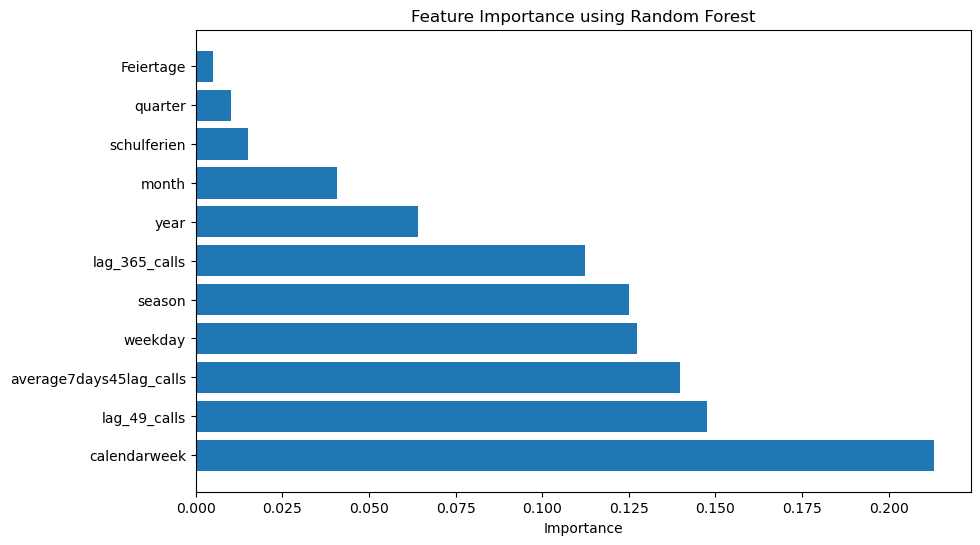

In [46]:
# Merkmalsauswahl mit Random Forest für calls
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls']
target = 'calls'

# Extrahieren der Daten
X = data[features]
y = data[target]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des Random-Forest-Modells
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Berechnen der Feature-Wichtigkeit
importances = rf.feature_importances_

# Erstellen eines DataFrames zur Anzeige der Feature-Wichtigkeit
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Wichtigkeit:")
print(feature_importance_df)

# Visualisieren der Feature-Wichtigkeit
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

Feature Wichtigkeit:
                        Feature  Importance
2                  calendarweek    0.199785
10  average7days45lag_Sickratio    0.175952
0                       weekday    0.136324
8              lag_49_Sickratio    0.128968
6                        season    0.125424
9             lag_365_Sickratio    0.115053
7                          year    0.044642
3                         month    0.042238
1                   schulferien    0.015835
4                       quarter    0.010769
5                     Feiertage    0.005011


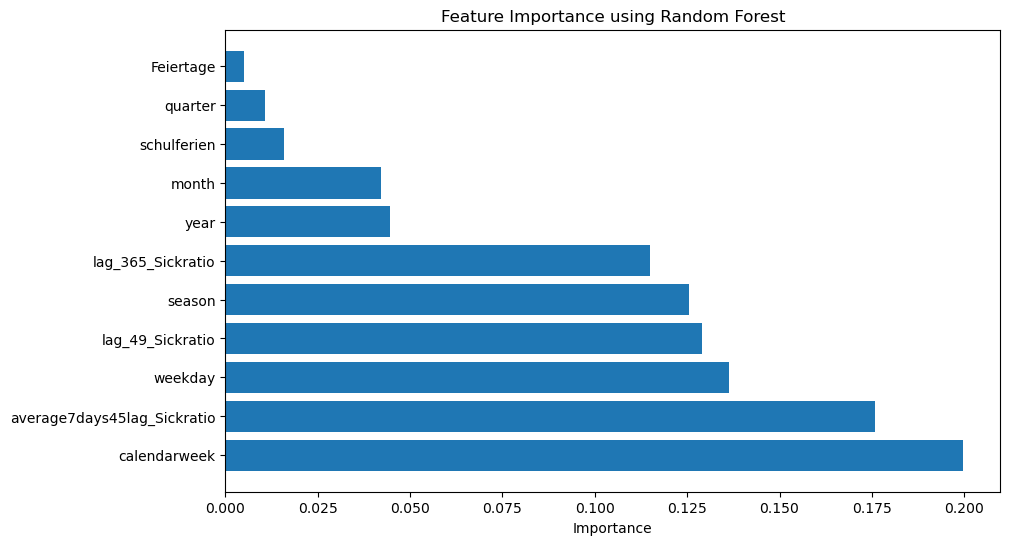

In [47]:
# Merkmalsauswahl mit Random Forest für calls
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Features und Zielwert definieren
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_Sickratio', 'lag_365_Sickratio', 'average7days45lag_Sickratio']

# Extrahieren der Daten
X = data[features]
y = data[target]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des Random-Forest-Modells
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Berechnen der Feature-Wichtigkeit
importances = rf.feature_importances_

# Erstellen eines DataFrames zur Anzeige der Feature-Wichtigkeit
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Wichtigkeit:")
print(feature_importance_df)

# Visualisieren der Feature-Wichtigkeit
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Zielvariable definieren
target = 'calls'

# Berechnung der Korrelationen
corr_month = data[[target, 'month']].corr().iloc[0, 1]
corr_week = data[[target, 'calendarweek']].corr().iloc[0, 1]
corr_season = data[[target, 'season']].corr().iloc[0, 1]
corr_year = data[[target, 'year']].corr().iloc[0, 1]
corr_weekday = data[[target, 'weekday']].corr().iloc[0, 1]
corr_schulferien = data[[target, 'schulferien']].corr().iloc[0, 1]
corr_quarter = data[[target, 'quarter']].corr().iloc[0, 1]
corr_n_duty = data[[target, 'n_sick']].corr().iloc[0, 1]
corr_n_sick = data[[target, 'n_duty']].corr().iloc[0, 1]
corr_Feiertage = data[[target, 'Feiertage']].corr().iloc[0, 1]
corr_lag49 = data[[target, 'lag_49_Sickratio']].corr().iloc[0, 1]
corr_lag365 = data[[target, 'lag_365_Sickratio']].corr().iloc[0, 1]
corr_7Mean45lag = data[[target, 'average7days45lag_Sickratio']].corr().iloc[0, 1]





print(f"Korrelation zwischen {target} und Monat: {corr_month}")
print(f"Korrelation zwischen {target} und Kalenderwoche: {corr_week}")
print(f"Korrelation zwischen {target} und season: {corr_season}")
print(f"Korrelation zwischen {target} und year: {corr_year}")
print(f"Korrelation zwischen {target} und weekday: {corr_weekday}")
print(f"Korrelation zwischen {target} und Schulferien: {corr_schulferien}")
print(f"Korrelation zwischen {target} und quarter: {corr_quarter}")
print(f"Korrelation zwischen {target} und Feiertage: {corr_Feiertage}")
print(f"Korrelation zwischen {target} und n_sick: {corr_n_sick}")
print(f"Korrelation zwischen {target} und n_duty: {corr_n_duty}")
print(f"Korrelation zwischen {target} und ag_49_Sickratio: {corr_lag49}")
print(f"Korrelation zwischen {target} und lag_365_Sickratio: {corr_lag365}")
print(f"Korrelation zwischen {target} und average7days45lag_Sickratio': {corr_7Mean45lag}")


Korrelation zwischen calls und Monat: -0.06234381339670603
Korrelation zwischen calls und Kalenderwoche: -0.08808173058321274
Korrelation zwischen calls und season: 0.18345896486973737
Korrelation zwischen calls und year: 0.20260294208075505
Korrelation zwischen calls und weekday: -0.24454765931725
Korrelation zwischen calls und Schulferien: 0.07275681857694205
Korrelation zwischen calls und quarter: -0.0717008639038938
Korrelation zwischen calls und Feiertage: 0.10202279960180735
Korrelation zwischen calls und n_sick: 0.20260294208080087
Korrelation zwischen calls und n_duty: 0.012203363812847897
Korrelation zwischen calls und ag_49_Sickratio: -0.14137843489289076
Korrelation zwischen calls und lag_365_Sickratio: -0.23671894437258217
Korrelation zwischen calls und average7days45lag_Sickratio': -0.1728282485994138


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Zielvariable definieren
target = 'Sick-ratio'

# Berechnung der Korrelationen
corr_month = data[[target, 'month']].corr().iloc[0, 1]
corr_week = data[[target, 'calendarweek']].corr().iloc[0, 1]
corr_season = data[[target, 'season']].corr().iloc[0, 1]
corr_year = data[[target, 'year']].corr().iloc[0, 1]
corr_weekday = data[[target, 'weekday']].corr().iloc[0, 1]
corr_schulferien = data[[target, 'schulferien']].corr().iloc[0, 1]
corr_quarter = data[[target, 'quarter']].corr().iloc[0, 1]
corr_n_duty = data[[target, 'n_sick']].corr().iloc[0, 1]
corr_n_sick = data[[target, 'n_duty']].corr().iloc[0, 1]
corr_Feiertage = data[[target, 'Feiertage']].corr().iloc[0, 1]
corr_lag49 = data[[target, 'lag_49_Sickratio']].corr().iloc[0, 1]
corr_lag365 = data[[target, 'lag_365_Sickratio']].corr().iloc[0, 1]
corr_7Mean45lag = data[[target, 'average7days45lag_Sickratio']].corr().iloc[0, 1]

print(f"Korrelation zwischen {target} und Monat: {corr_month}")
print(f"Korrelation zwischen {target} und Kalenderwoche: {corr_week}")
print(f"Korrelation zwischen {target} und season: {corr_season}")
print(f"Korrelation zwischen {target} und year: {corr_year}")
print(f"Korrelation zwischen {target} und weekday: {corr_weekday}")
print(f"Korrelation zwischen {target} und Schulferien: {corr_schulferien}")
print(f"Korrelation zwischen {target} und quarter: {corr_quarter}")
print(f"Korrelation zwischen {target} und Feiertage: {corr_Feiertage}")
print(f"Korrelation zwischen {target} und n_sick: {corr_n_sick}")
print(f"Korrelation zwischen {target} und n_duty: {corr_n_duty}")
print(f"Korrelation zwischen {target} und ag_49_Sickratio: {corr_lag49}")
print(f"Korrelation zwischen {target} und lag_365_Sickratio: {corr_lag365}")
print(f"Korrelation zwischen {target} und average7days45lag_Sickratio': {corr_7Mean45lag}")

Korrelation zwischen Sick-ratio und Monat: 0.21114636358279695
Korrelation zwischen Sick-ratio und Kalenderwoche: 0.2195565465848514
Korrelation zwischen Sick-ratio und season: 0.21796136712001613
Korrelation zwischen Sick-ratio und year: 0.10157183100526194
Korrelation zwischen Sick-ratio und weekday: -0.07477268704930624
Korrelation zwischen Sick-ratio und Schulferien: -0.09938498009310044
Korrelation zwischen Sick-ratio und quarter: 0.2140414582574561
Korrelation zwischen Sick-ratio und Feiertage: -0.02393225747407814
Korrelation zwischen Sick-ratio und n_sick: 0.10157183100537746
Korrelation zwischen Sick-ratio und n_duty: 0.9786695466196969
Korrelation zwischen Sick-ratio und ag_49_Sickratio: 0.04182305750256812
Korrelation zwischen Sick-ratio und lag_365_Sickratio: 0.09253781914397327
Korrelation zwischen Sick-ratio und average7days45lag_Sickratio': 0.04130018319486267


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path)

# Zielvariable definieren
target = 'n_sick'

# Berechnung der Korrelationen
corr_month = data[[target, 'month']].corr().iloc[0, 1]
corr_week = data[[target, 'calendarweek']].corr().iloc[0, 1]
corr_season = data[[target, 'season']].corr().iloc[0, 1]
corr_year = data[[target, 'year']].corr().iloc[0, 1]
corr_weekday = data[[target, 'weekday']].corr().iloc[0, 1]
corr_schulferien = data[[target, 'schulferien']].corr().iloc[0, 1]
corr_quarter = data[[target, 'quarter']].corr().iloc[0, 1]
corr_Feiertage = data[[target, 'Feiertage']].corr().iloc[0, 1]
corr_n_duty = data[[target, 'n_duty']].corr().iloc[0, 1]

print(f"Korrelation zwischen {target} und Monat: {corr_month}")
print(f"Korrelation zwischen {target} und Kalenderwoche: {corr_week}")
print(f"Korrelation zwischen {target} und season: {corr_season}")
print(f"Korrelation zwischen {target} und year: {corr_year}")
print(f"Korrelation zwischen {target} und weekday: {corr_weekday}")
print(f"Korrelation zwischen {target} und Schulferien: {corr_schulferien}")
print(f"Korrelation zwischen {target} und quarter: {corr_quarter}")
print(f"Korrelation zwischen {target} und Feiertage: {corr_Feiertage}")
print(f"Korrelation zwischen {target} und n_duty {corr_n_duty}")


Korrelation zwischen n_sick und Monat: 0.09829646516191554
Korrelation zwischen n_sick und Kalenderwoche: 0.10786223594406062
Korrelation zwischen n_sick und season: 0.1249028358798499
Korrelation zwischen n_sick und year: 0.3007261440856976
Korrelation zwischen n_sick und weekday: -0.0719686961003459
Korrelation zwischen n_sick und Schulferien: -0.1098906233125911
Korrelation zwischen n_sick und quarter: 0.1004262648762745
Korrelation zwischen n_sick und Feiertage: -0.015864065529673003
Korrelation zwischen n_sick und n_duty 0.30072614408581044
